algortimo PCA, para reducir la dimensionalidad de un conjunto de datos, en el fondo lo que se hace es una proyeccion de los puntos a dimensiones menores.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA


In [4]:
df = sns.load_dataset("iris")
df.iloc[:,: -1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
pca_model = PCA(n_components=2)
df_pca = pca_model.fit_transform(df.iloc[:,:-1])
df_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

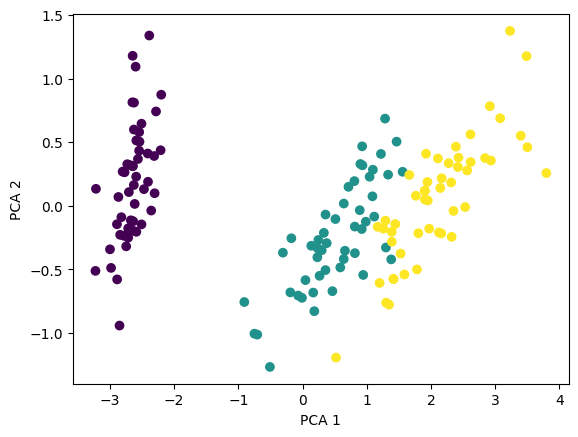

In [6]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=df["species"].astype("category").cat.codes)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


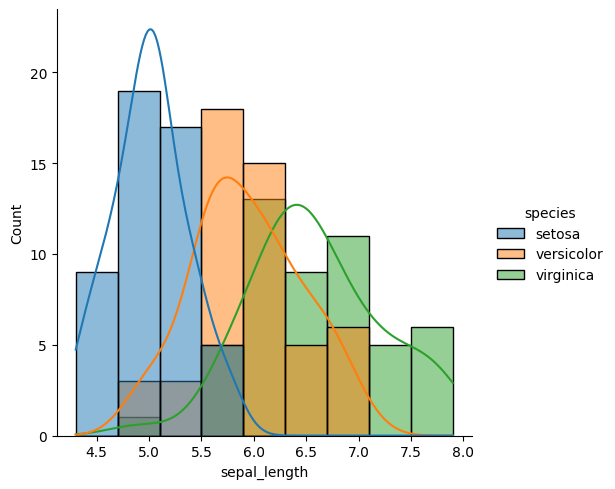

In [7]:
sns.displot(data=df, x="sepal_length", hue="species", kde= True)
plt.show()

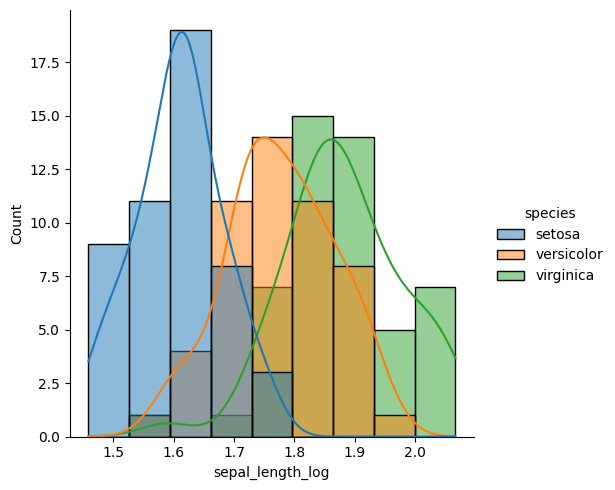

In [8]:
# Transformacion logaritmica
df["sepal_length_log"] = np.log(df["sepal_length"])

sns.displot(data=df, x="sepal_length_log", hue="species", kde= True)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_log
0,5.1,3.5,1.4,0.2,setosa,1.629241
1,4.9,3.0,1.4,0.2,setosa,1.589235
2,4.7,3.2,1.3,0.2,setosa,1.547563
3,4.6,3.1,1.5,0.2,setosa,1.526056
4,5.0,3.6,1.4,0.2,setosa,1.609438
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.902108
146,6.3,2.5,5.0,1.9,virginica,1.840550
147,6.5,3.0,5.2,2.0,virginica,1.871802
148,6.2,3.4,5.4,2.3,virginica,1.824549


In [11]:
std_scaler = StandardScaler()
df_std_scaler = std_scaler.fit_transform(df.iloc[:,: -2])
df_std_scaler


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [12]:

mm_scaler = MinMaxScaler()
df_normalized = mm_scaler.fit_transform(df.iloc[: , : -2])
df_normalized

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [15]:
#tecnicna de correlacion de pearson
from scipy.stats import pearsonr


In [17]:
# Calcular la correlacion de pearson
correlacion, _ = pearsonr(df["sepal_length"], df["petal_length"])

In [18]:
print(f"la correalcion de pearson entre sepal length y petal length es: {correlacion}")

la correalcion de pearson entre sepal length y petal length es: 0.8717537758865831


In [19]:
#tecnica analisis de cluster
from sklearn.cluster import KMeans

In [20]:
model = KMeans(n_clusters=3, random_state=42)

df["cluster"] = model.fit_predict(df.iloc[:,:-2])
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_log,cluster
0,5.1,3.5,1.4,0.2,setosa,1.629241,1
1,4.9,3.0,1.4,0.2,setosa,1.589235,1
2,4.7,3.2,1.3,0.2,setosa,1.547563,1
3,4.6,3.1,1.5,0.2,setosa,1.526056,1
4,5.0,3.6,1.4,0.2,setosa,1.609438,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.902108,0
146,6.3,2.5,5.0,1.9,virginica,1.840550,2
147,6.5,3.0,5.2,2.0,virginica,1.871802,0
148,6.2,3.4,5.4,2.3,virginica,1.824549,0


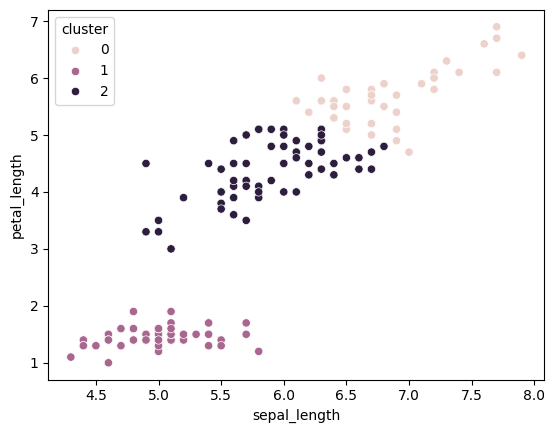

In [21]:
sns.scatterplot(data=df, x="sepal_length", y="petal_length", hue="cluster")
plt.show()

In [22]:
# calcualr Z-Score
df["Z_Score_sepal_length"] = np.abs((df["sepal_length"] - df["sepal_length"].mean() / df["sepal_length"].std()))
df

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_log,cluster,Z_Score_sepal_length
0,5.1,3.5,1.4,0.2,setosa,1.629241,1,1.956602
1,4.9,3.0,1.4,0.2,setosa,1.589235,1,2.156602
2,4.7,3.2,1.3,0.2,setosa,1.547563,1,2.356602
3,4.6,3.1,1.5,0.2,setosa,1.526056,1,2.456602
4,5.0,3.6,1.4,0.2,setosa,1.609438,1,2.056602
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.902108,0,0.356602
146,6.3,2.5,5.0,1.9,virginica,1.840550,2,0.756602
147,6.5,3.0,5.2,2.0,virginica,1.871802,0,0.556602
148,6.2,3.4,5.4,2.3,virginica,1.824549,0,0.856602


In [24]:
outliers = df[df["Z_Score_sepal_length"] > 2]
outliers

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_log,cluster,Z_Score_sepal_length
1,4.9,3.0,1.4,0.2,setosa,1.589235,1,2.156602
2,4.7,3.2,1.3,0.2,setosa,1.547563,1,2.356602
3,4.6,3.1,1.5,0.2,setosa,1.526056,1,2.456602
4,5.0,3.6,1.4,0.2,setosa,1.609438,1,2.056602
6,4.6,3.4,1.4,0.3,setosa,1.526056,1,2.456602
7,5.0,3.4,1.5,0.2,setosa,1.609438,1,2.056602
8,4.4,2.9,1.4,0.2,setosa,1.481605,1,2.656602
9,4.9,3.1,1.5,0.1,setosa,1.589235,1,2.156602
11,4.8,3.4,1.6,0.2,setosa,1.568616,1,2.256602
12,4.8,3.0,1.4,0.1,setosa,1.568616,1,2.256602


<Axes: xlabel='sepal_length', ylabel='petal_length'>

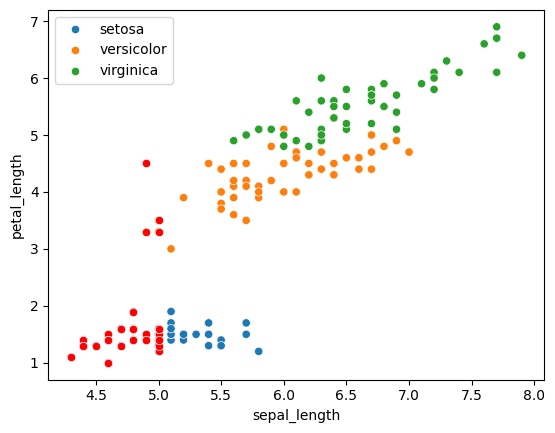

In [25]:
sns.scatterplot(data = df, x="sepal_length", y="petal_length", hue="species")
sns.scatterplot(data = outliers, x="sepal_length", y="petal_length", c="red")
